# Assignment 4: More Matplotlib

The goal here is to replicate the figures you see as closely as possible.

In order to get some data, you will have to run the code in the cells below. **Don't worry about how this code works.** In the end, it will give you some numpy arrays, which you will use in your plots. You are not allowed to use any packages other than numpy and matplotlib to complete your assignment.

### Problem 1: Line plots

In this problem, we will plot some daily weather data from a NOAA station in [Millbrook, NY](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:US1NYDT0008/detail). A full description of this dataset is available at: <https://www.ncdc.noaa.gov/data-access/land-based-station-data>

The cell below uses pandas to download the data and populate a bunch of numpy arrays (`t_daily_min`, `t_daily_max`, etc.) Run the cell and then use the numpy arrays to try to re-create the plot you see.

In [3]:
import urllib
import pandas as pd

header_url = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/HEADERS.txt'
with urllib.request.urlopen(header_url) as response:
    data = response.read().decode('utf-8')
lines = data.split('\n')
headers = lines[1].split(' ')

ftp_base = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/'
dframes = []
for year in range(2016, 2019):
    data_url = f'{year}/CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(ftp_base + data_url, parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

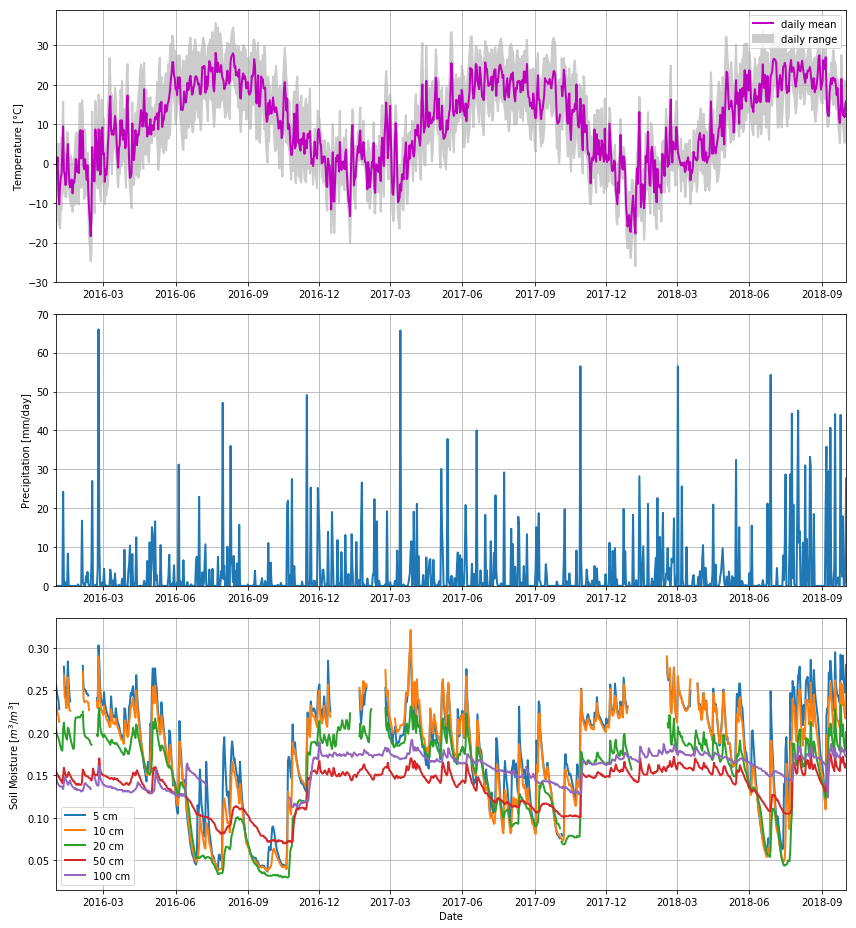

In [5]:
#set up the figure and axes
fig, axes = plt.subplots(figsize=(12,13), nrows=3)
ax0, ax1,ax2 = axes

#plot the mean temperature and the temperature range by employing min and max temp
ax0.plot(date, t_daily_mean,color = 'm',label = 'daily mean',linewidth=2)
ax0.fill_between(date,t_daily_min,t_daily_max,color='0.8',label = 'daily range',linewidth=2)
ax0.set_ylabel('Temperature [°C]')
ax0.set_ylim(-30, 39)
ax0.set_xlim(date[0],date[-1])
ax0.legend()
ax0.grid()

#plot the precipitation in the second row of the subplot
ax1.plot(date, p_daily_calc,linewidth=2)
ax1.set_ylabel('Precipitation [mm/day]')
ax1.set_xlim(date[0],date[-1])
ax1.set_ylim(0,70)
ax1.grid()

#plot all the soil moisture into one graph and make it stylish
ax2.plot(date, soil_moisture_5,label = '5 cm',linewidth=2)
ax2.plot(date, soil_moisture_10,label = '10 cm',linewidth=2)
ax2.plot(date, soil_moisture_20,label = '20 cm',linewidth=2)
ax2.plot(date, soil_moisture_50,label = '50 cm',linewidth=2)
ax2.plot(date, soil_moisture_100,label = '100 cm',linewidth=2)
ax2.set_xlim(date[0],date[-1])
ax2.set_ylabel('Soil Moisture $[m ^{3}/ m ^{3}]$')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid()

plt.tight_layout()

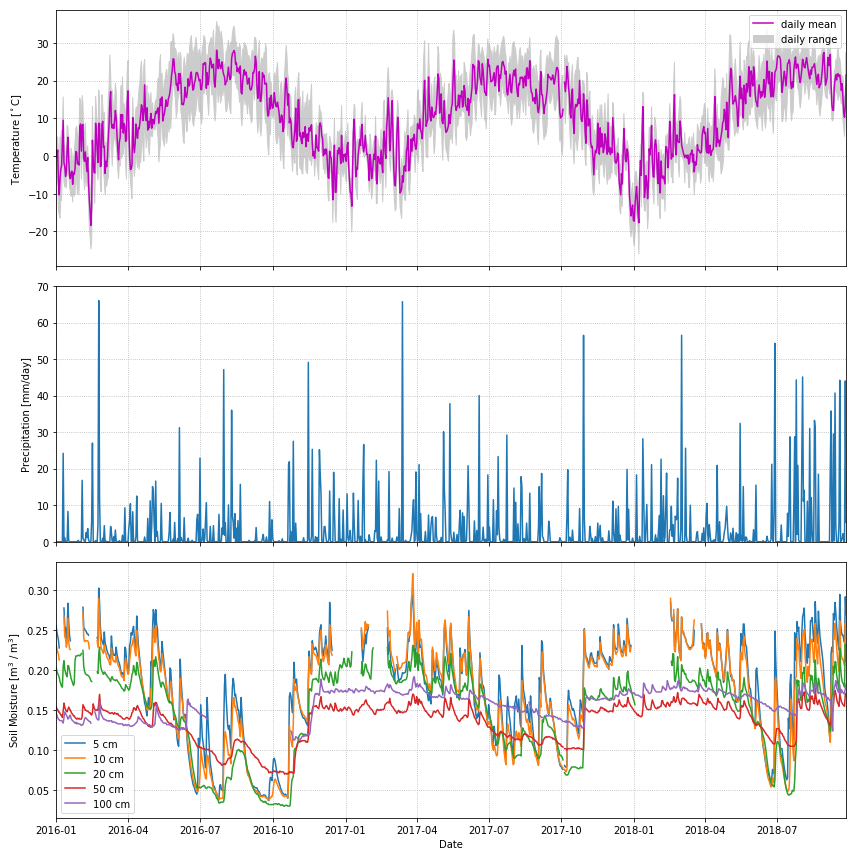

### Problem 2: Contour Plots

Now we will visualize some global temperature data from the NCEP-NCAR atmospheric reanalysis. This data comes from the IRI data library: https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods

Again, run the cell to get the data, and then use the numpy arrays (`temp`, `lon`, and `lat`) to re-create the plot shown.

In [6]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values


In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

Text(0,0.5,'°C')

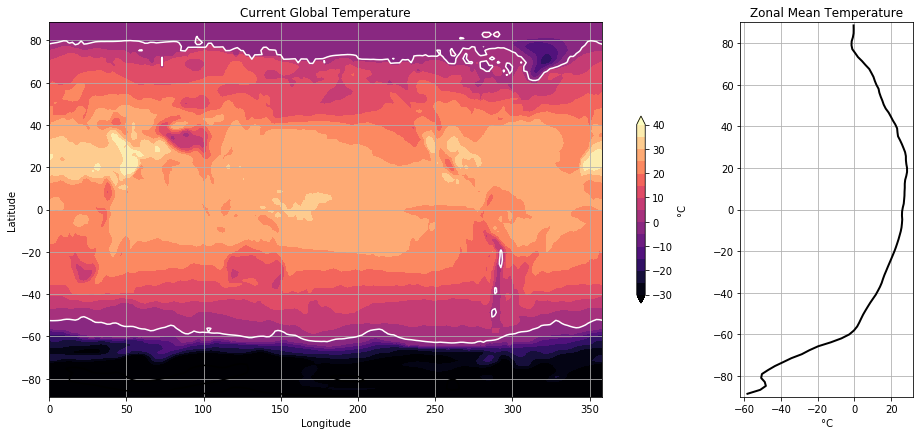

In [14]:
#set up the figure and axes
fig = plt.figure(figsize=(12,4))
ax1= fig.add_axes([0,0,0.8,1.3])
ax2= fig.add_axes([0.8,0,0.2,1.3])

#plot the contour map and specify where temperature = 0
templevels = np.arange(-30, 41, 5)
cf0 = ax1.contourf(lon, lat,temp, templevels,cmap='magma', extend='both')
ret = ax1.contour(lon,lat,temp,1,cmap='gist_gray')
ax1.set_ylabel('Latitude')
ax1.set_xlabel('Longitude')
ax1.set_title('Current Global Temperature')
ax1.grid()

#plot the averaged mean temperature as zonal mean
T_mean = temp.mean(axis=1)
ax2.plot(T_mean,lat,color='k',linewidth=2)
ax2.set_xlabel('°C')
ax2.set_xlim(-62,32)
ax2.set_ylim(-90,90)
ax2.set_title('Zonal Mean Temperature',fontsize = 12)
ax2.grid()

#plot the colorbar and annotate it
cbar = fig.colorbar(cf0, ax=ax1,shrink =0.5)
cbar.ax.set_ylabel('°C')

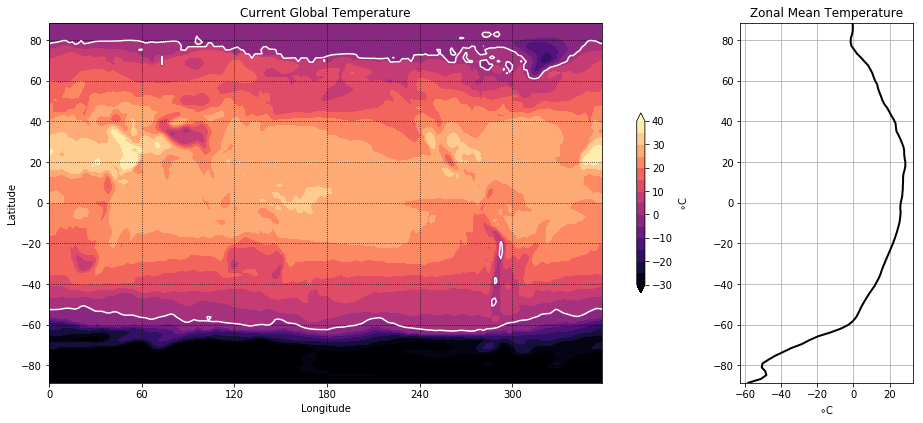